# Content and Objectives

- Show effects of getting baseband out of bandpass
- rect signal with carrier frequency being down-converted

# Import

In [1]:
# importing
import numpy as np

from scipy import signal 

import matplotlib.pyplot as plt
import matplotlib

# showing figures inline
%matplotlib inline

In [2]:
# plotting options 
font = {'size'   : 20}
plt.rc('font', **font)
plt.rc('text', usetex=True)

matplotlib.rc('figure', figsize=(18, 10) )

# Parameters

In [3]:
# number of symbols    
n_symb = 10
t_symb = 1.0 

n_sps = 256            # samples per symbol
t_sample = t_symb / n_sps

# vector denoting time samples
t_vec = np.arange( 0, n_symb, t_sample )

# carrier frequency
f_c = 10

# initialize frequency regime
N_fft = 2048
Omega = np.linspace( -np.pi, np.pi, N_fft )
f_vec = Omega / ( 2 * np.pi * t_symb / n_sps )


# Band-pass to baseband

In [4]:
# NOTE: CAPITALS describing frequency regime


# define filter response as rectangular and get frequency regime
rect = np.append( np.ones( n_sps), np.zeros( len( t_vec ) - n_sps ) )

RECT = 1/n_sps * np.fft.fftshift( np.fft.fft( rect, N_fft ) )
magnitude_rect = np.abs( RECT )

# modulate by multiplication with cosine
rect_modulated = rect * np.cos( 2 * np.pi * f_c * t_vec )

RECT_modulated = 1/n_sps * np.fft.fftshift( np.fft.fft( rect_modulated, N_fft ) )
magnitude_rect_modulated = np.abs( RECT_modulated )


# multiplying with cosine
demod = rect_modulated * 2 * np.cos( 2 * np.pi * f_c * t_vec )


# find lowpass filter

# Nyquist and cutoff frequency of the filter
nyq_freq = 1.0 / ( t_sample * 2.0 )        
cutoff_freq = nyq_freq / 8.0

# ripples and transition width of the filter
ripple_db = 60                      
width = nyq_freq / 5000.0

# find filter order and beta parameter
N, beta = signal.kaiserord( ripple_db, width )    

# find filter and normalize to energy 1
taps = signal.firwin( N, cutoff=cutoff_freq,  window=('kaiser', beta), nyq=nyq_freq)
taps /= np.linalg.norm( taps )


# apply filtering to mixed signal
demod_filtered = np.convolve( demod, taps )
demod_filtered /= np.sqrt(2)
    
    
# get magnitude spectra
DEMOD = 1 / n_sps * np.fft.fftshift( np.fft.fft( demod, N_fft ) )
magnitude_demod = np.abs( DEMOD )

DEMOD_filtered = 1 / n_sps * np.fft.fftshift( np.fft.fft( demod_filtered, N_fft ) )
magnitude_filtered = np.abs( DEMOD_filtered ) / 2


# Plotting

Text(0, 0.5, '$|\\tilde{S}(f)|$')

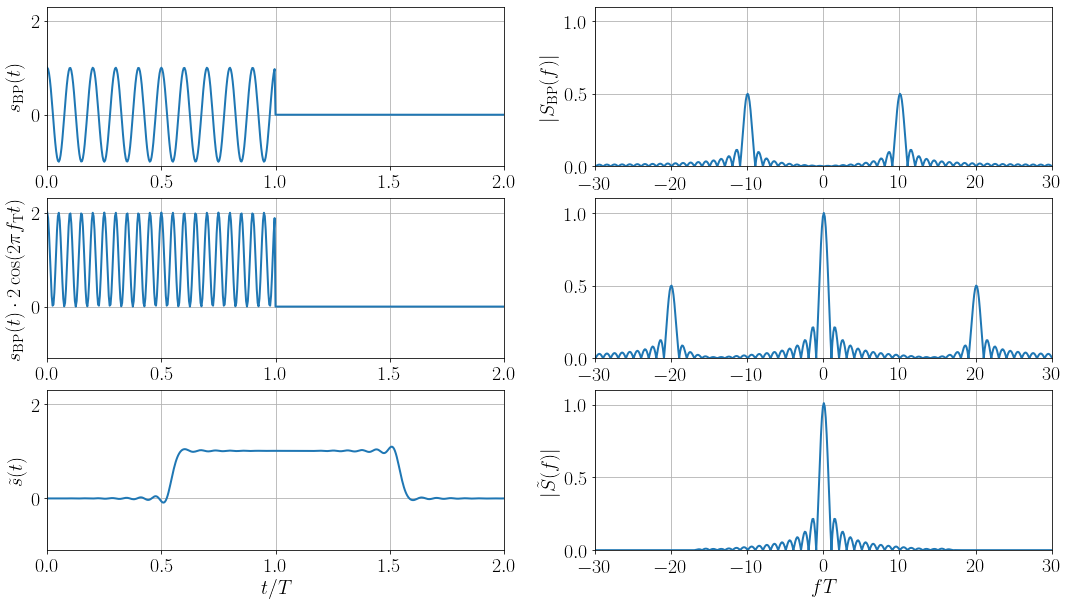

In [5]:
# plotting results
plt.subplot(321)
plt.plot( np.arange(np.size(rect_modulated))*t_symb/n_sps, rect_modulated, linewidth=2.0, label='Rect')

plt.ylim( (-1.1, 2.3 ) ) 
plt.grid(True)  
plt.ylabel('$s_\mathrm{BP}(t)$')
plt.xlim( (0, 2*t_symb ) )


plt.subplot(322)
plt.plot( f_vec, magnitude_rect_modulated, linewidth=2.0, label='Rect mod.')  

plt.grid(True)       
plt.xlim( (-3*f_c, 3*f_c ) )
plt.ylim( (0, 1.1 ) )
plt.ylabel('$|S_\mathrm{BP}(f)|$') 


plt.subplot(323)
plt.plot( np.arange(np.size(rect_modulated))*t_symb/n_sps, demod, linewidth=2.0)

plt.ylim( (-1.1, 2.3 ) ) 
plt.grid(True)  
plt.ylabel('$s_\mathrm{BP}(t) \cdot 2\cos(2\pi f_\\mathrm{T} t)$')
plt.xlim( (0, 2*t_symb ) )


plt.subplot(324)
plt.plot( f_vec, magnitude_demod, linewidth=2.0, label='Rect mod.')  

plt.grid(True)       
plt.xlim( (-3*f_c, 3*f_c ) )
plt.ylim( (0, 1.1 ) )



plt.subplot(325)
plt.plot( np.arange(np.size(demod_filtered))*t_symb/n_sps, demod_filtered/2, linewidth=2.0)

plt.grid(True)  
plt.ylabel('$\\tilde{s}(t)$')
plt.xlabel( '$t/T$' )
plt.xlim( (0, 2*t_symb ) )
plt.ylim( (-1.1, 2.3 ) )    


plt.subplot(326)
plt.plot( f_vec, magnitude_filtered, linewidth=2.0, label='Rect mod.')  

plt.grid(True)       
plt.xlim( (-3*f_c, 3*f_c ) )
plt.ylim( (0, 1.1 ) )
plt.xlabel('$fT$')   
plt.ylabel('$|\\tilde{S}(f)|$')